In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, cohen_kappa_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from imblearn.ensemble import BalancedRandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [114]:
data = "../data/w_clean.csv"
w_model = pd.read_csv(data, header=0,index_col=0)
w_model.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,0.0,0.0,0,44.0,0,0,...,1007.1,8.0,8.0,16.9,21.8,0.0,0.0,2008,12,1
1,0,7.4,25.1,0.0,0.0,0.0,1,44.0,1,1,...,1007.8,8.0,8.0,17.2,24.3,0.0,0.0,2008,12,2
2,0,12.9,25.7,0.0,0.0,0.0,2,46.0,0,1,...,1008.7,8.0,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,0,9.2,28.0,0.0,0.0,0.0,3,24.0,2,2,...,1012.8,8.0,8.0,18.1,26.5,0.0,0.0,2008,12,4
4,0,17.5,32.3,1.0,0.0,0.0,0,41.0,3,3,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


<Axes: >

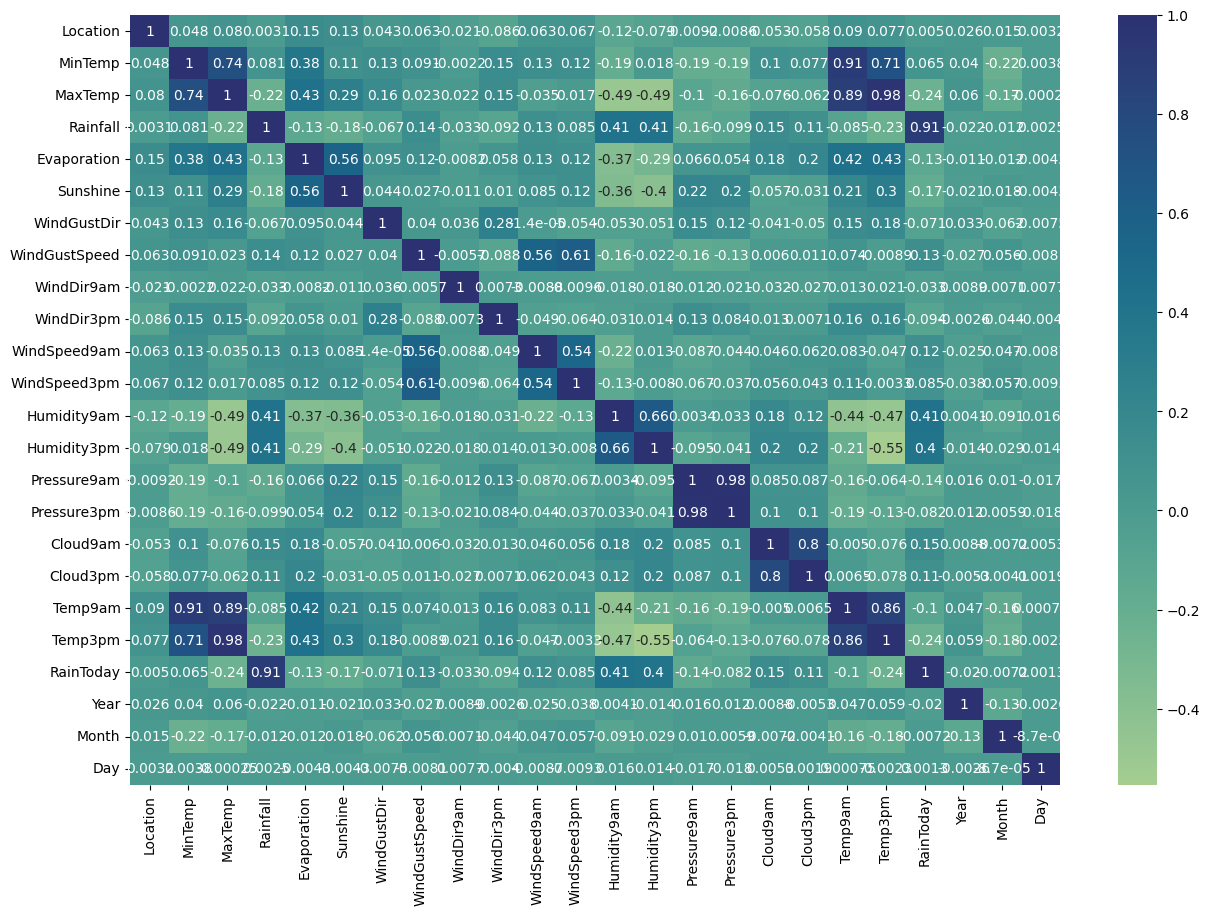

In [116]:
# Heatmap
corr = w_model.drop(columns= 'RainTomorrow').corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'crest')

In [117]:
#comparaison correlation  MinTemp & MaxTemp avec the target
print(f"Correlation entre MinTemp et MaxTemp :{w_model['MinTemp'].corr(w_model['MaxTemp'])}")
print(f"Correlation entre MinTemp et the target :{w_model['MinTemp'].corr(w_model['RainTomorrow'])}")
print(f"Correlation entre MaxTemp et the target :{w_model['MaxTemp'].corr(w_model['RainTomorrow'])}")

Correlation entre MinTemp et MaxTemp :0.7407905911444022
Correlation entre MinTemp et the target :0.09728329770917528
Correlation entre MaxTemp et the target :-0.19401956097834228


In [118]:
#comparaison correlation Temp3pm & Temp9am avec the target
print(f"Correlation entre Temp3pm et Temp9am :{w_model['Temp3pm'].corr(w_model['Temp9am'])}")
print(f"Correlation entre Temp3pm et the target :{w_model['Temp3pm'].corr(w_model['RainTomorrow'])}")
print(f"Correlation entre Temp9am et the target :{w_model['Temp9am'].corr(w_model['RainTomorrow'])}")

Correlation entre Temp3pm et Temp9am :0.8570697794151376
Correlation entre Temp3pm et the target :-0.2323209272420116
Correlation entre Temp9am et the target :-0.03580380721121241


In [119]:
# drop 'MinTemp' et 'Temp9am' 
w_model.drop(columns = ['MinTemp','Temp9am'], inplace = True)

In [120]:
X = w_model.drop(['RainTomorrow'],axis=1)
y = w_model['RainTomorrow']

In [121]:
scaler = MinMaxScaler()
minMaxScaler_x = scaler.fit_transform(X)

In [122]:
# Separation entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [123]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (176505, 22)
y_train shape: (176505,)
X_test shape: (44127, 22)
y_test shape: (44127,)


In [124]:
model_RandomForest = RandomForestClassifier(criterion='entropy',n_estimators=40) 
model_RandomForest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [125]:
y_pred = model_RandomForest.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9475377886554717


In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95     22064
         1.0       0.92      0.97      0.95     22063

    accuracy                           0.95     44127
   macro avg       0.95      0.95      0.95     44127
weighted avg       0.95      0.95      0.95     44127



In [128]:
param_grid = {'n_estimators':[1,5,9,13,15,19,22]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid , cv=5)
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 9, 13, 15, 19, 22]})

In [129]:
# Afficher les meilleurs paramètres et la meilleure précision
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

Meilleurs paramètres : {'n_estimators': 22}
Meilleure précision : 0.9330500552392283


In [130]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.308105,0.011685,0.018445,0.006468,1,{'n_estimators': 1},0.845217,0.847171,0.845330,0.850373,0.847228,0.847064,0.001866,7
1,1.455881,0.054351,0.053618,0.005598,5,{'n_estimators': 5},0.907425,0.908218,0.905300,0.906462,0.907425,0.906966,0.001002,6
2,2.431741,0.063509,0.086491,0.010243,9,{'n_estimators': 9},0.917963,0.919096,0.919067,0.920201,0.919804,0.919226,0.000764,5
3,3.699877,0.116579,0.119908,0.008372,13,{'n_estimators': 13},0.923685,0.925894,0.924053,0.924393,0.924138,0.924433,0.000765,4
4,4.184313,0.216755,0.146153,0.020775,15,{'n_estimators': 15},0.926546,0.927367,0.926489,0.926291,0.927028,0.926744,0.000395,3
5,5.406860,0.167676,0.172854,0.005797,19,{'n_estimators': 19},0.928812,0.929435,0.927764,0.927056,0.928897,0.928393,0.000860,2
6,6.636745,0.364067,0.215703,0.020124,22,{'n_estimators': 22},0.933770,0.933996,0.932693,0.932467,0.932325,0.933050,0.000694,1


In [131]:
# Intégrer les meilleurs paramètres dans le modèle
best_rf = RandomForestClassifier(**grid_search.best_params_)

# Ajuster le modèle avec les meilleurs paramètres
best_rf.fit(X_train, y_train)

# Évaluer le modèle final
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95     22064
         1.0       0.93      0.97      0.95     22063

    accuracy                           0.95     44127
   macro avg       0.95      0.95      0.95     44127
weighted avg       0.95      0.95      0.95     44127

